In [ ]:
!pip install tensorflow-recommenders
!pip install tensorflow
!pip install pandas
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_recommenders as tfrs
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

In [ ]:
# Load the dataset (adjust the path based on your environment)
df = pd.read_csv('workout_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())


   id  age  height  weight  fitness_goal workout_level  \
0   0   23     169      87  build muscle      advanced   
1   1   50     182      87   lose weight      beginner   
2   2   33     177      62   lose weight  intermediate   
3   3   25     172      75  build muscle      beginner   
4   4   29     163      51      maintain      beginner   

                       health_conditions  \
0                          Heart Disease   
1                            Sleep Apnea   
2  Gastroesophageal Reflux Disease(GERD)   
3                                 Anemia   
4                            Cholesterol   

                          recommend_workout  \
0                   crunches, lunges, plank   
1  lunges, plank, pushups, crunches, squats   
2  lunges, plank, pushups, crunches, squats   
3            squats, plank, lunges, pushups   
4                   crunches, lunges, plank   

                                         repetitions  \
0               crunches: 35, lunges: 20, plank

In [ ]:
# Fill any missing values in the 'health_conditions' column with 'unknown'
df['health_conditions'] = df['health_conditions'].fillna('unknown')

# Drop unnecessary columns if any (e.g., 'id')
df = df.drop(columns=['id'], errors='ignore')  # Assuming 'id' column exists, modify if needed


In [ ]:
# Check for missing values
print(df.isnull().sum())

age                  0
height               0
weight               0
fitness_goal         0
workout_level        0
health_conditions    0
recommend_workout    0
repetitions          0
sets                 0
image_url            0
dtype: int64


In [ ]:


# Load the modified dataset (the one you created with repetitions, sets, and image URLs)
df = pd.read_csv('workout_dataset.csv')

# Define features and target variable
# We only consider numeric and categorical variables as input features, excluding repetition counts, sets, and images
X = df[['age', 'height', 'weight']]  # Numerical features
y = df['recommend_workout']  # Target variable

# One-hot encode the categorical variables (fitness_goal, workout_level, health_conditions)
encoder = OneHotEncoder(sparse_output=False)

# Assuming fitness_goal, workout_level, and health_conditions are in the dataset
encoded_categorical = encoder.fit_transform(df[['fitness_goal', 'workout_level', 'health_conditions']])

# Combine numerical and one-hot encoded categorical features
X = np.hstack((X.values, encoded_categorical))

# Encode target variable (recommend_workout) into numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert the encoded target variable (recommend_workout) to a categorical format
num_classes = len(np.unique(y_encoded))
y_categorical = tf.keras.utils.to_categorical(y_encoded, num_classes)

# Now you can use X and y_categorical to train a neural network model.
print(f"Shape of input features X: {X.shape}")
print(f"Shape of target variable y (categorical): {y_categorical.shape}")


Shape of input features X: (70000, 18)
Shape of target variable y (categorical): (70000, 5)


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),  # Input layer
    tf.keras.layers.Dense(128, activation='relu'),  # First hidden layer with 128 units
    tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer with 64 units
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax for classification
])



In [ ]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs with training data and validate on test data
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7441 - loss: 1.3170 - val_accuracy: 0.9429 - val_loss: 0.1295
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9684 - loss: 0.0936 - val_accuracy: 0.9790 - val_loss: 0.0591
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9739 - loss: 0.0711 - val_accuracy: 0.9809 - val_loss: 0.0491
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9756 - loss: 0.0660 - val_accuracy: 0.9786 - val_loss: 0.0519
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0518 - val_accuracy: 0.9772 - val_loss: 0.0526
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9796 - loss: 0.0459 - val_accuracy: 0.9716 - val_loss: 0.0668
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9815 - loss: 0.0439 - val_accuracy: 0.9782 - val_loss: 0.0465
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9821 - loss: 0.0415 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Workout: squats, plank, lunges, pushups
Repetitions: lunges: 15, plank: 45s, pushups: 20, crunches: 25, squats: 15
Sets: lunges: 3, plank: 3, pushups: 3, crunches: 3, squats: 3
Displaying image for squats:


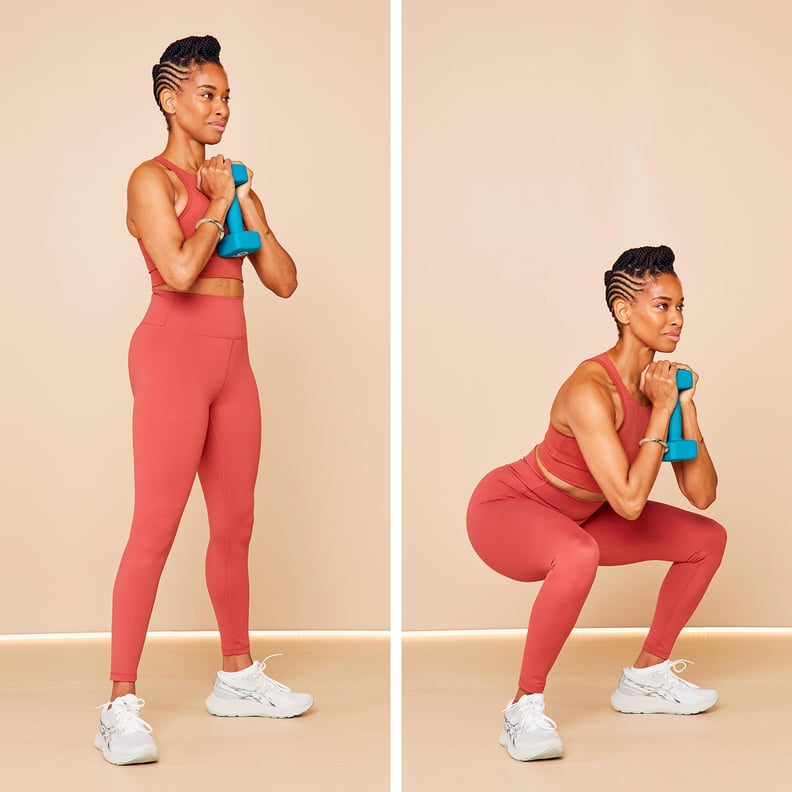

Displaying image for plank:


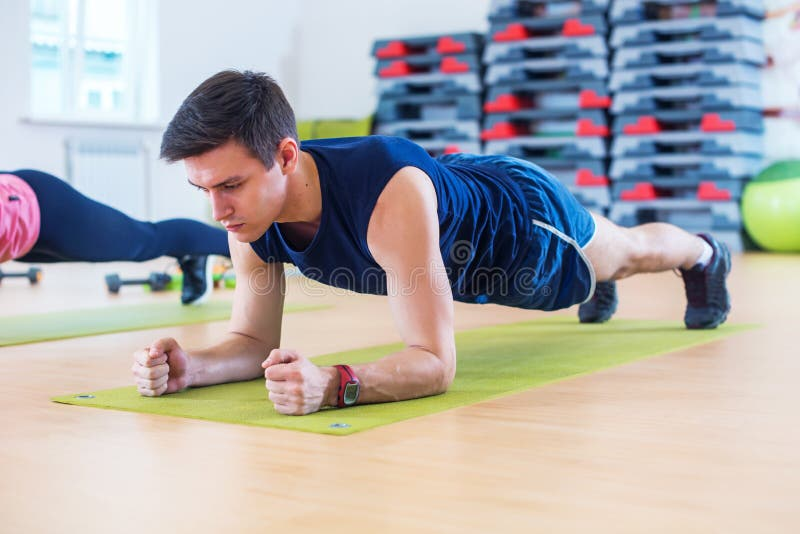

Displaying image for lunges:


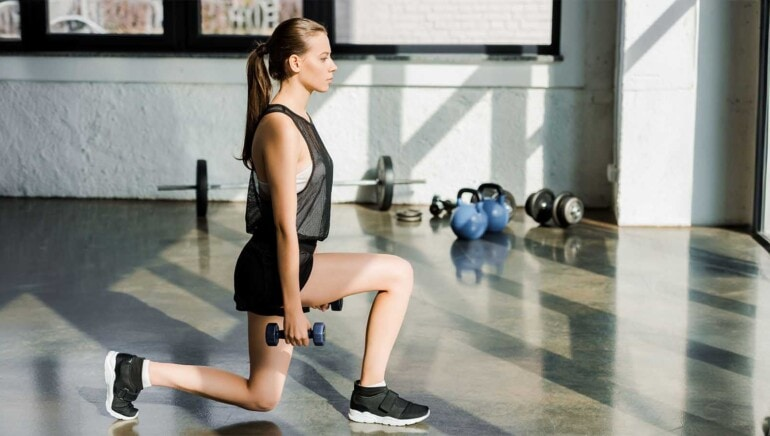

Displaying image for pushups:


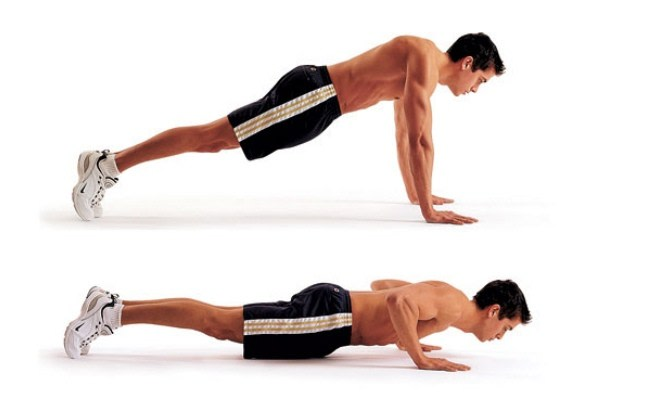

Predicted workout for the single sample: squats, plank, lunges, pushups


In [ ]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

# Define a dictionary that maps each exercise to its respective image URL
exercise_image_mapping = {
    'lunges': 'https://images.healthshots.com/healthshots/en/uploads/2024/05/02174153/Lunges-770x436.jpg',
    'plank': 'https://thumbs.dreamstime.com/b/fitness-training-athletic-sporty-man-doing-plank-exercise-gym-yoga-class-exercising-workout-70718580.jpg',
    'pushups': 'https://lasvegastoppicks.com/wp-content/uploads/2023/07/Pushups-on-Las-Vegas-Top-Picks.jpg',
    'crunches': 'https://fitnessdrum.com/wp-content/uploads/2021/09/oblique-crunches-min.png',
    'squats': 'https://media1.popsugar-assets.com/files/thumbor/uymLdLwcsZuQzm4oFGNFY2QLl5g=/fit-in/792x792/filters:format_auto():upscale()/2023/12/21/819/n/1922729/tmp_UyrHy8_feb4a42e2a9b21aa_PS23_Fitness_Workout_13_Move_06_Goblet_Squat.jpg'
}

# Function to display the image from the URL
def display_image_from_url(image_url):
    try:
        response = requests.get(image_url)
        img = Image.open(BytesIO(response.content))
        display(img)
    except Exception as e:
        print(f"Error loading image: {e}")

# Function to display workout details including names, repetitions, sets, and images
def display_workout_details_single(row, workout_name):
    print(f"Predicted Workout: {workout_name}")
    print(f"Repetitions: {row['repetitions']}")
    print(f"Sets: {row['sets']}")

    # Split the workout name into individual exercises (assuming comma-separated)
    workout_list = workout_name.split(', ')

    # Display the image for each exercise in the predicted workout
    for exercise in workout_list:
        if exercise in exercise_image_mapping:
            print(f"Displaying image for {exercise}:")
            display_image_from_url(exercise_image_mapping[exercise])
        else:
            print(f"No image available for {exercise}")

# Get a single sample from the test set (e.g., 4th test sample)
single_sample_index = 2
single_sample = X_test[single_sample_index].reshape(1, -1)

# Make a prediction for the single sample
single_prediction = model.predict(single_sample)

# Get the predicted class index (argmax to get the most likely class)
predicted_class = np.argmax(single_prediction, axis=1)

# Convert the predicted class back to the workout name using the label encoder
predicted_workout = label_encoder.inverse_transform(predicted_class)[0]

# Get the corresponding row from the original dataset for this test sample
df_single_test = df.iloc[X_test.shape[0]:].iloc[single_sample_index]  # Match the test indices to your original dataframe
# Display the workout details for the single sample
display_workout_details_single(df_single_test, predicted_workout)

# Output the predicted workout
print(f"Predicted workout for the single sample: {predicted_workout}")
